# Exploring Weather Trends Project

### <font color=blue> In this project, the temperature trends in Abu Dhabi city (AD) are compared to the overall global temperature trends. For this purpose, the average temperatures of both AD and the world will be used. In addition, their calculated moving averages will be used to smooth out the corresponding line charts.

## Extracting the Data (SQL)

``` mysql

        SELECT d.year, d.avg_temp AS AD_avg_temp, g.avg_temp AS global_avg_temp
        FROM city_data d
        JOIN global_data g ON g.year = d.year
        where d.city = 'Abu Dhabi' AND d.year >= 1861 * ```  

        
#### *  <font color=blue> The condition on the year is imposed to remove the set of the first 18  years which contain Null values</font>


## Moving Averages calculations

### <font color=blue> The graph of the average temperatures is volatile and a general trend is not observable. After several trials, a 20 years moving average seems to better show the general trend.

In [1]:
# Confirm current directory
import os
os.chdir(r"/Users/z10392/Documents/Self development/udacity/DA projects/Project 1")

# use pandas to read the excel file
import pandas as pd
data=pd.read_excel('ADvsGlobSQL.xlsx')
data.head()

,year,ad_avg_temp,global_avg_temp
0,1861,25.10,7.85
1,1862,25.34,7.56
2,1863,23.62,8.11
3,1864,26.00,7.98
4,1865,26.26,8.18


In [2]:
# Calculate Moving averages and appending them to the table 

N = 20 #  20 years 

CumSum = [0]
AD_M_avgs =[]
for i, value in enumerate(data['ad_avg_temp'], 1): #to loop over the column
    CumSum.append(CumSum[i-1] + value)
    if i>=N:
        M_avg = (CumSum[i] - CumSum[i-N])/N  
        AD_M_avgs.append(M_avg)
        
# Append the calculated averages to the table 
se = pd.Series([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]+AD_M_avgs)
data['AD_20_years_MA'] = se


#Calculate 20-years moving Averages for the World
CumSum = [0]
Global_M_avgs = []
for i, value in enumerate(data['global_avg_temp'], 1):
    CumSum.append(CumSum[i-1] + value)
    if i>=N:
        M_avg = (CumSum[i] - CumSum[i-N])/N
        Global_M_avgs.append(M_avg)
        
# Append the calculated averages to the table 
se = pd.Series([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]+Global_M_avgs)
data['Global_20_years_MA'] = se

data.head()

,year,ad_avg_temp,global_avg_temp,AD_20_years_MA,Global_20_years_MA
0,1861,25.10,7.85,0.0,0.0
1,1862,25.34,7.56,0.0,0.0
2,1863,23.62,8.11,0.0,0.0
3,1864,26.00,7.98,0.0,0.0
4,1865,26.26,8.18,0.0,0.0


## <font color=coral> __Question#1__</font> Is Abudhabi hotter or cooler on average compared to the global average? Has the difference been consistent over time?

In [3]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(20,5))

X = data["year"][N:]
Y=data["AD_20_years_MA"][N:].values
Z=data["Global_20_years_MA"][N:].values

a = np.array(Y)
b = np.array(Z)
list_data =np.column_stack((a, b))

wide_df = pd.DataFrame(list_data, X, ["AD", "Global"])
ax = sns.lineplot(data=wide_df)
ax.set(xlabel='Year', ylabel='20-years Moving Average temperature ($C^O$)', title = 'AD\'s vs Global\'s 20 years Moving Average (MA)', xticks=np.arange(1861, 2013, 2))
plt.xticks(rotation=90)

(array([1861, 1863, 1865, 1867, 1869, 1871, 1873, 1875, 1877, 1879, 1881,
        1883, 1885, 1887, 1889, 1891, 1893, 1895, 1897, 1899, 1901, 1903,
        1905, 1907, 1909, 1911, 1913, 1915, 1917, 1919, 1921, 1923, 1925,
        1927, 1929, 1931, 1933, 1935, 1937, 1939, 1941, 1943, 1945, 1947,
        1949, 1951, 1953, 1955, 1957, 1959, 1961, 1963, 1965, 1967, 1969,
        1971, 1973, 1975, 1977, 1979, 1981, 1983, 1985, 1987, 1989, 1991,
        1993, 1995, 1997, 1999, 2001, 2003, 2005, 2007, 2009, 2011]),
 <a list of 76 Text xticklabel objects>)

### <font color=coral> (observation#1)</font> <font color=blue>It is observed that Abu Dhabi is hotter on average than the world as its line graph lies above $25C^O$ while the world's line is below $10C^O$.</font>

### <font color=coral> (observation#2)</font> <font color=blue>The difference seems to be consistent as the two lines don’t overlap and they almost look parallel. Also the differences between AD and Global's avg. temperatures range from 17.16 to 18.99, as calculated below, which implies that the differences do not vary significantly  </font>

In [4]:
a = np.array(data["ad_avg_temp"][N:].values)
b = np.array(data["global_avg_temp"][N:].values)
Differences=a-b

print('Differences = ' +str(Differences) )

print('Range =' + str(np.amax(Differences)-np.amin(Differences)))
print(np.amin(Differences),np.amax(Differences))

Differences = [18.48 17.92 18.32 18.38 18.18 18.43 18.17 18.21 18.29 18.23 18.41 18.48
 18.3  18.08 17.83 18.15 18.   17.74 18.17 17.93 17.99 18.51 17.66 18.4
 18.07 17.86 18.22 18.15 18.39 17.67 17.44 18.18 18.15 17.97 18.31 17.67
 18.02 17.9  17.86 17.84 17.49 18.36 17.9  18.52 17.73 17.92 17.83 17.71
 18.36 17.75 17.82 17.52 17.72 17.54 17.92 17.69 17.52 17.43 17.37 17.73
 18.11 18.14 17.66 18.04 17.87 17.92 18.05 17.94 17.7  17.6  18.06 18.04
 18.02 18.33 17.99 18.28 17.53 18.12 17.7  18.08 17.77 18.   17.75 17.48
 18.1  18.16 17.77 17.68 18.49 18.54 17.87 17.66 17.59 17.99 17.75 18.08
 18.58 18.2  18.23 18.18 17.76 17.52 17.16 17.6  17.97 17.87 17.92 17.75
 17.46 17.88 17.28 17.26 18.15 18.21 17.4  18.16 17.67 18.67 18.87 18.47
 18.41 18.43 18.59 18.75 18.2  18.41 18.35 18.16 18.53 18.99 18.73 18.95
 18.4 ]
Range =1.8299999999999983
(17.160000000000004, 18.990000000000002)


## <font color=coral> __Question#2__</font> How do the changes in AD's temperatures over time compare to the changes in the global average?

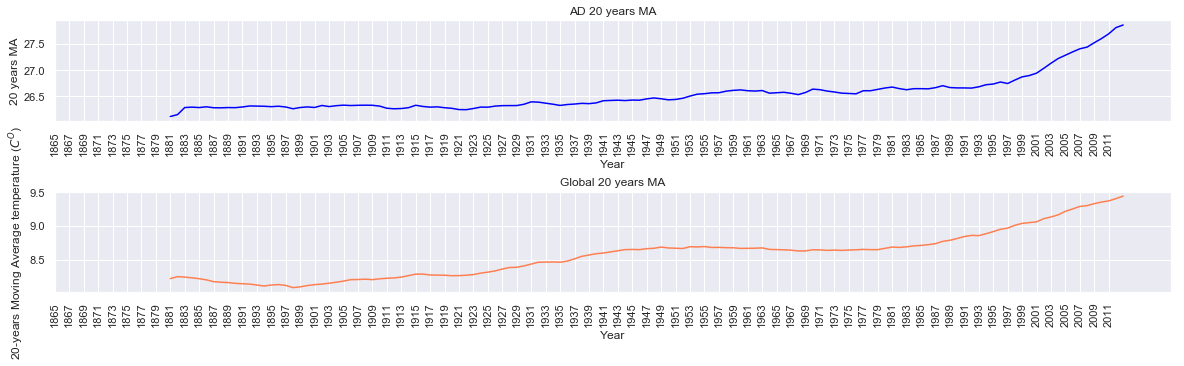

In [5]:

plt.figure(figsize=(20,5))
plt.subplot(2, 1, 1)

X = data["year"][N:]
Y = data["AD_20_years_MA"][N:]

ax = sns.lineplot(x=X, y=Y,color="blue")
ax.set(xlabel='Year', ylabel='20 years MA', title = 'AD 20 years MA', xticks=np.arange(1865, 2013, 2))

plt.xticks(rotation=90)

plt.subplot(2, 1, 2)

Y = data["Global_20_years_MA"][N:]
ax = sns.lineplot(x=X, y=Y,color="coral")
ax.set(xlabel='Year', ylabel='20-years Moving Average temperature ($C^O$)', title = 'Global 20 years MA', xticks=np.arange(1865, 2013, 2))
plt.xticks(rotation=90)



plt.subplots_adjust(hspace=0.7)
plt.show()


### <font color=coral> (observation#3)</font> <font color=blue> It looks like the rise in the temperature is a global trend rather than a particular phenomenon occurring in AD. However, the changes in AD's temperatures are more consistent over time in comparison with the changes in the global average. This is observed in the above graphs, especially in the interval 1915-1989 where we can see more vertically streached ups and downs in the Global's graph. </font>

## <font color=coral> __Question#3__</font> What does the overall trend look like? Is the world getting hotter or cooler? Has the trend been consistent over the last few hundred years?!

### <font color=coral> (observation#4)</font> <font color=blue> The world is getting hotter. The line exhibits an upward trend in general despite the insignificant decreases here and there. </font>


## <font color=coral> __Question#4__</font> Is there a correlation between AD's average temperatures and the global's? 

### <font color=coral> (observation#5)</font> <font color=blue> The correlation coefficient calculation below shows a strong positive correlation of 0.796 </font>

In [6]:
from sklearn import linear_model
import math

X=data[['global_avg_temp']].values
Y=data[['ad_avg_temp']].values

lm = linear_model.LinearRegression()
lm.fit(X,Y)

print('correlation coeffecient:',math.sqrt(lm.score(X,Y)))

('correlation coeffecient:', 0.7961832086623665)


## <font color=coral> __Question#5__</font> Could the average temperature in AD be estimated based on the average global temperature? 

Reg_line_Equation = Y = 1.1558775904490928X + 16.657483644069174


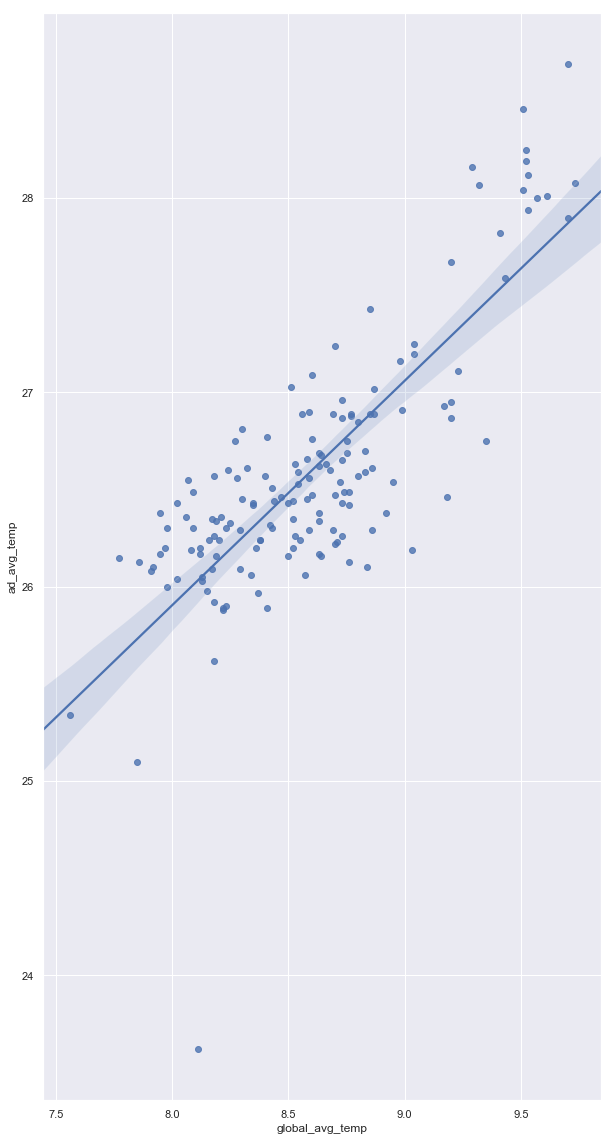

In [7]:
#Regression line plot 
print('Reg_line_Equation = ' + 'Y = '+ str(lm.coef_[0][0]) + 'X + ' + str(lm.intercept_[0]))
import seaborn as sns
plt.figure(figsize=(10,20))
sns.regplot(x=data['global_avg_temp'], y=data['ad_avg_temp'])


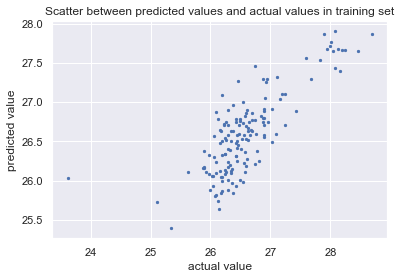

In [8]:
#Predictions vs actual values plot 
p=lm.predict(X)
plt.title('Scatter between predicted values and actual values in training set')
plt.scatter(Y,p,s=5)
plt.xlabel('actual value')
plt.ylabel('predicted value')
plt.rcParams["figure.figsize"] = [10,20]
plt.show()

In [9]:
#Exact errors
Exact_errors=abs(p-Y)
Exact_errors

array([[6.31122729e-01],
       [5.59182279e-02],
       [2.41165090e+00],
       [1.18613184e-01],
       [1.47437666e-01],
       [1.49708869e-01],
       [2.69094925e-02],
       [1.36526235e-01],
       [1.08468268e-01],
       [1.04320114e-01],
       [1.26790321e-01],
       [3.58788902e-02],
       [1.10938476e-01],
       [1.01531732e-01],
       [3.87318495e-01],
       [1.93025425e-01],
       [6.13217335e-02],
       [2.73882768e-01],
       [1.10035580e-02],
       [1.56790321e-01],
       [5.33408683e-01],
       [4.76845442e-03],
       [4.18613184e-01],
       [5.11347478e-01],
       [2.87965840e-01],
       [5.33289512e-01],
       [2.79524615e-01],
       [2.91466649e-01],
       [3.35614803e-01],
       [3.30171960e-01],
       [5.02378081e-01],
       [5.64584201e-01],
       [3.86142977e-01],
       [1.50555218e-01],
       [9.78860062e-02],
       [2.12761338e-01],
       [5.02911311e-02],
       [1.92562334e-01],
       [2.03144596e-01],
       [5.24431629e-02],


In [10]:
# Estimations more recent years 

Actual_AD_2014=28.2
Actual_AD_2015=29.2 
#Source for actual values: https://www.statista.com/statistics/632988/uae-abu-dhabi-average-annual-temperature/

# Given world's avg temp 9.57 and 9.83 in 2014 and 2015, repesctively.(From the project database)
estimate_AD_2014=lm.predict(9.57)
estimate_AD_2015=lm.predict(9.83) 


print('Year=2014','Estimated =' + str(estimate_AD_2014[0][0]), 'Actual =' + str(Actual_AD_2014))
print('Year=2015','Estimated =' + str(estimate_AD_2015[0][0]), 'Actual =' + str(Actual_AD_2015))

('Year=2014', 'Estimated =27.719232184666993', 'Actual =28.2')
('Year=2015', 'Estimated =28.019760358183756', 'Actual =29.2')


### <font color=coral> (observation#6)</font> <font color=blue> The linear regression model could be used to estimate the average temperature in future in AD based on the average global temperature with an acceptable difference </font>